#PCA:
PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path=("/content/drive/MyDrive/PCA India Data_Census.xlsx")
data_pca=pd.read_excel(path)

PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc

In [ ]:
data_pca.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [ ]:
data_pca.shape

(640, 61)

In [ ]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [ ]:
data_pca.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [ ]:
data_pca.duplicated().sum()

0

PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

#For preforming EDA
* I have taken No_HH,TOT_M,TOT_F,M_LIT,F_LIT these five variables.

* New Column is created to find the Gender ratio and Total literate people.

* Gender ratio is calculated by dividing Total male by total Female.

		Gender ratio = (TOT_M) / (TOT_F)

* Total literate people are calculated by adding Male literate and Female Literate.

		LIT_TOTAL = M_LIT + F_LIT




In [ ]:
data_df=data_pca.iloc[:,0:16]
data_df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,0,1999,2598,13381,11364,10007
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,6,427,517,10513,7891,9072
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,6,5806,9723,4534,5840,2012
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,0,2666,3968,1842,1962,942
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,33,7670,10843,13243,13477,7348


In [ ]:
data_df["Gender ratio"]=data_df["TOT_M"]/data_df["TOT_F"]
data_df["LIT_TOTAL"]=data_df["M_LIT"]+data_df["F_LIT"]

In [ ]:
data_df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,Gender ratio,LIT_TOTAL
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,0,1999,2598,13381,11364,10007,0.784938,24745
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,6,427,517,10513,7891,9072,0.847762,18404
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,6,5806,9723,4534,5840,2012,0.597045,10374
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,0,2666,3968,1842,1962,942,0.661912,3804
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,33,7670,10843,13243,13477,7348,0.686802,26720


In [ ]:
data_df.groupby(["State"]).mean()["Gender ratio"].sort_values(ascending=False)

State
Lakshadweep                 0.868061
Haryana                     0.777742
NCT of Delhi                0.766436
Uttar Pradesh               0.762436
Punjab                      0.747843
Bihar                       0.746294
Meghalaya                   0.736105
Jammu & Kashmir             0.728013
Daman & Diu                 0.702191
Chandigarh                  0.700037
Rajasthan                   0.687548
Assam                       0.685665
Jharkhand                   0.677664
Gujarat                     0.662355
Sikkim                      0.657083
West Bengal                 0.649317
Dadara & Nagar Havelli      0.644631
Manipur                     0.641547
Karnataka                   0.636473
Madhya Pradesh              0.635514
Andaman & Nicobar Island    0.633861
Mizoram                     0.633117
Himachal Pradesh            0.628779
Tripura                     0.622312
Goa                         0.620158
Uttarakhand                 0.618892
Puducherry                  0.60

In [ ]:
data_df.groupby(["Area Name"]).mean()["Gender ratio"].sort_values(ascending=False)

Area Name
Lakshadweep       0.868061
Badgam            0.847762
Mahamaya Nagar    0.847313
Dhaulpur          0.846911
Baghpat           0.844003
                    ...   
Baudh             0.451455
West Godavari     0.450076
Virudhunagar      0.449352
Koraput           0.440769
Krishna           0.437972
Name: Gender ratio, Length: 635, dtype: float64

In [ ]:
data_df.groupby(["Area Name"]).mean()["LIT_TOTAL"].sort_values(ascending=False)

Area Name
Mumbai Suburban               971997.0
Malappuram                    942969.0
North Twenty Four Parganas    901900.0
Thane                         819742.0
Bangalore                     797044.0
                                ...   
Longleng                        2765.0
Lahul & Spiti                   2238.0
Upper Siang                     1704.0
Anjaw                           1059.0
Dibang Valley                    657.0
Name: LIT_TOTAL, Length: 635, dtype: float64

In [ ]:
data_df.groupby(["State"]).mean()["LIT_TOTAL"].sort_values(ascending=False)

State
Kerala                      446323.928571
West Bengal                 337470.368421
Maharashtra                 226504.142857
Andhra Pradesh              219633.652174
Karnataka                   181984.433333
Tamil Nadu                  177828.031250
Uttar Pradesh               163255.690141
NCT of Delhi                155787.333333
Gujarat                     124318.307692
Punjab                      123428.000000
Bihar                       121221.657895
Goa                         119565.000000
Rajasthan                    83760.515152
Haryana                      81031.333333
Uttarakhand                  80928.615385
Assam                        80602.703704
Odisha                       79026.200000
Tripura                      78535.250000
Chandigarh                   76990.000000
Himachal Pradesh             73357.250000
Chhattisgarh                 73261.277778
Jharkhand                    65365.833333
Madhya Pradesh               63874.500000
Meghalaya                   

In [ ]:
data_df.groupby(["State"]).sum()["No_HH"].sort_values(ascending=False)

State
Uttar Pradesh               4006871
Maharashtra                 3136214
Andhra Pradesh              3127287
Tamil Nadu                  2964700
West Bengal                 2615284
Karnataka                   2268615
Kerala                      1982663
Bihar                       1974627
Madhya Pradesh              1503764
Gujarat                     1235200
Odisha                      1202073
Rajasthan                   1177124
Assam                        853374
Punjab                       796030
Chhattisgarh                 734616
Jharkhand                    681905
Haryana                      565971
NCT of Delhi                 394821
Uttarakhand                  392668
Himachal Pradesh             305317
Jammu & Kashmir              203645
Meghalaya                    126845
Tripura                      120647
Manipur                       83320
Goa                           79595
Puducherry                    53950
Nagaland                      53423
Mizoram               

* The state which has higher gender ratio is Lakshadweep with 86 % and lowest is Andhra Pradesh with 53%
* The district which has highest gender ratio is Lakshadweep with 86% and lowest is Krishna with 43%
* The highest number of literate people are in Kerala state and Mumbai Suburban area.
* The lowest number of literate people is in Arunachal Pradesh and in Dibang valley.
* Highest number of households is in Uttar Pradesh. Lowest is in Dadar and Nagar Havelli.
*The highest male to female literate ratio is in Mewat and lowest is in Pathanamthitta.

<Axes: xlabel='LIT_TOTAL', ylabel='No_HH'>

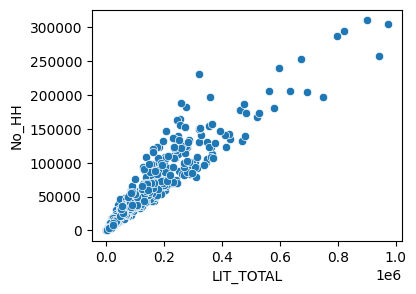

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=data_df,x="LIT_TOTAL",y="No_HH")

<Axes: xlabel='Gender ratio', ylabel='No_HH'>

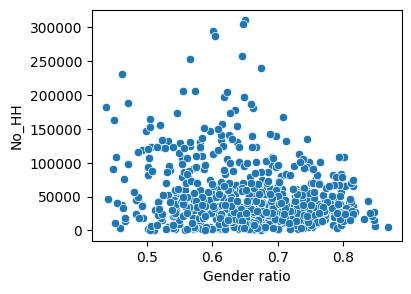

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=data_df,x="Gender ratio",y="No_HH")

<Axes: xlabel='Gender ratio', ylabel='LIT_TOTAL'>

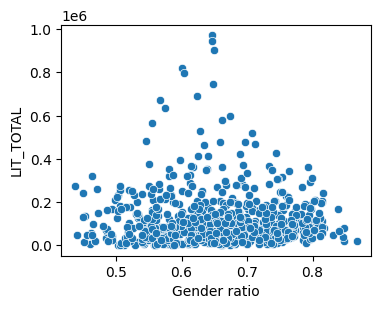

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=data_df,x="Gender ratio",y="LIT_TOTAL")

<Axes: xlabel='F_LIT', ylabel='M_LIT'>

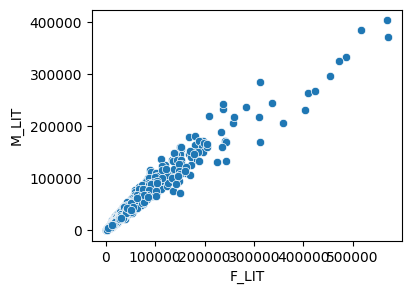

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=data_df,x="F_LIT",y="M_LIT")

#Insights from EDA:
* There is positive correlation between total literates and the number of households.
* There is no correlation between Gender ratio and number of households.
* There is no correlation between Gender ratio and Total literates.
* There is a positive correlation between Literate Females and Literate Males.


PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

In [ ]:
mydata=data_pca.iloc[:,4:61]

In [ ]:
mydata.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478


In [ ]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0
F_ST,640.0,10155.640625,15875.701488,0.0,429.50,3834.5,12480.25,130119.0
M_LIT,640.0,57967.979688,55910.282466,286.0,21298.00,42693.5,77989.50,403261.0


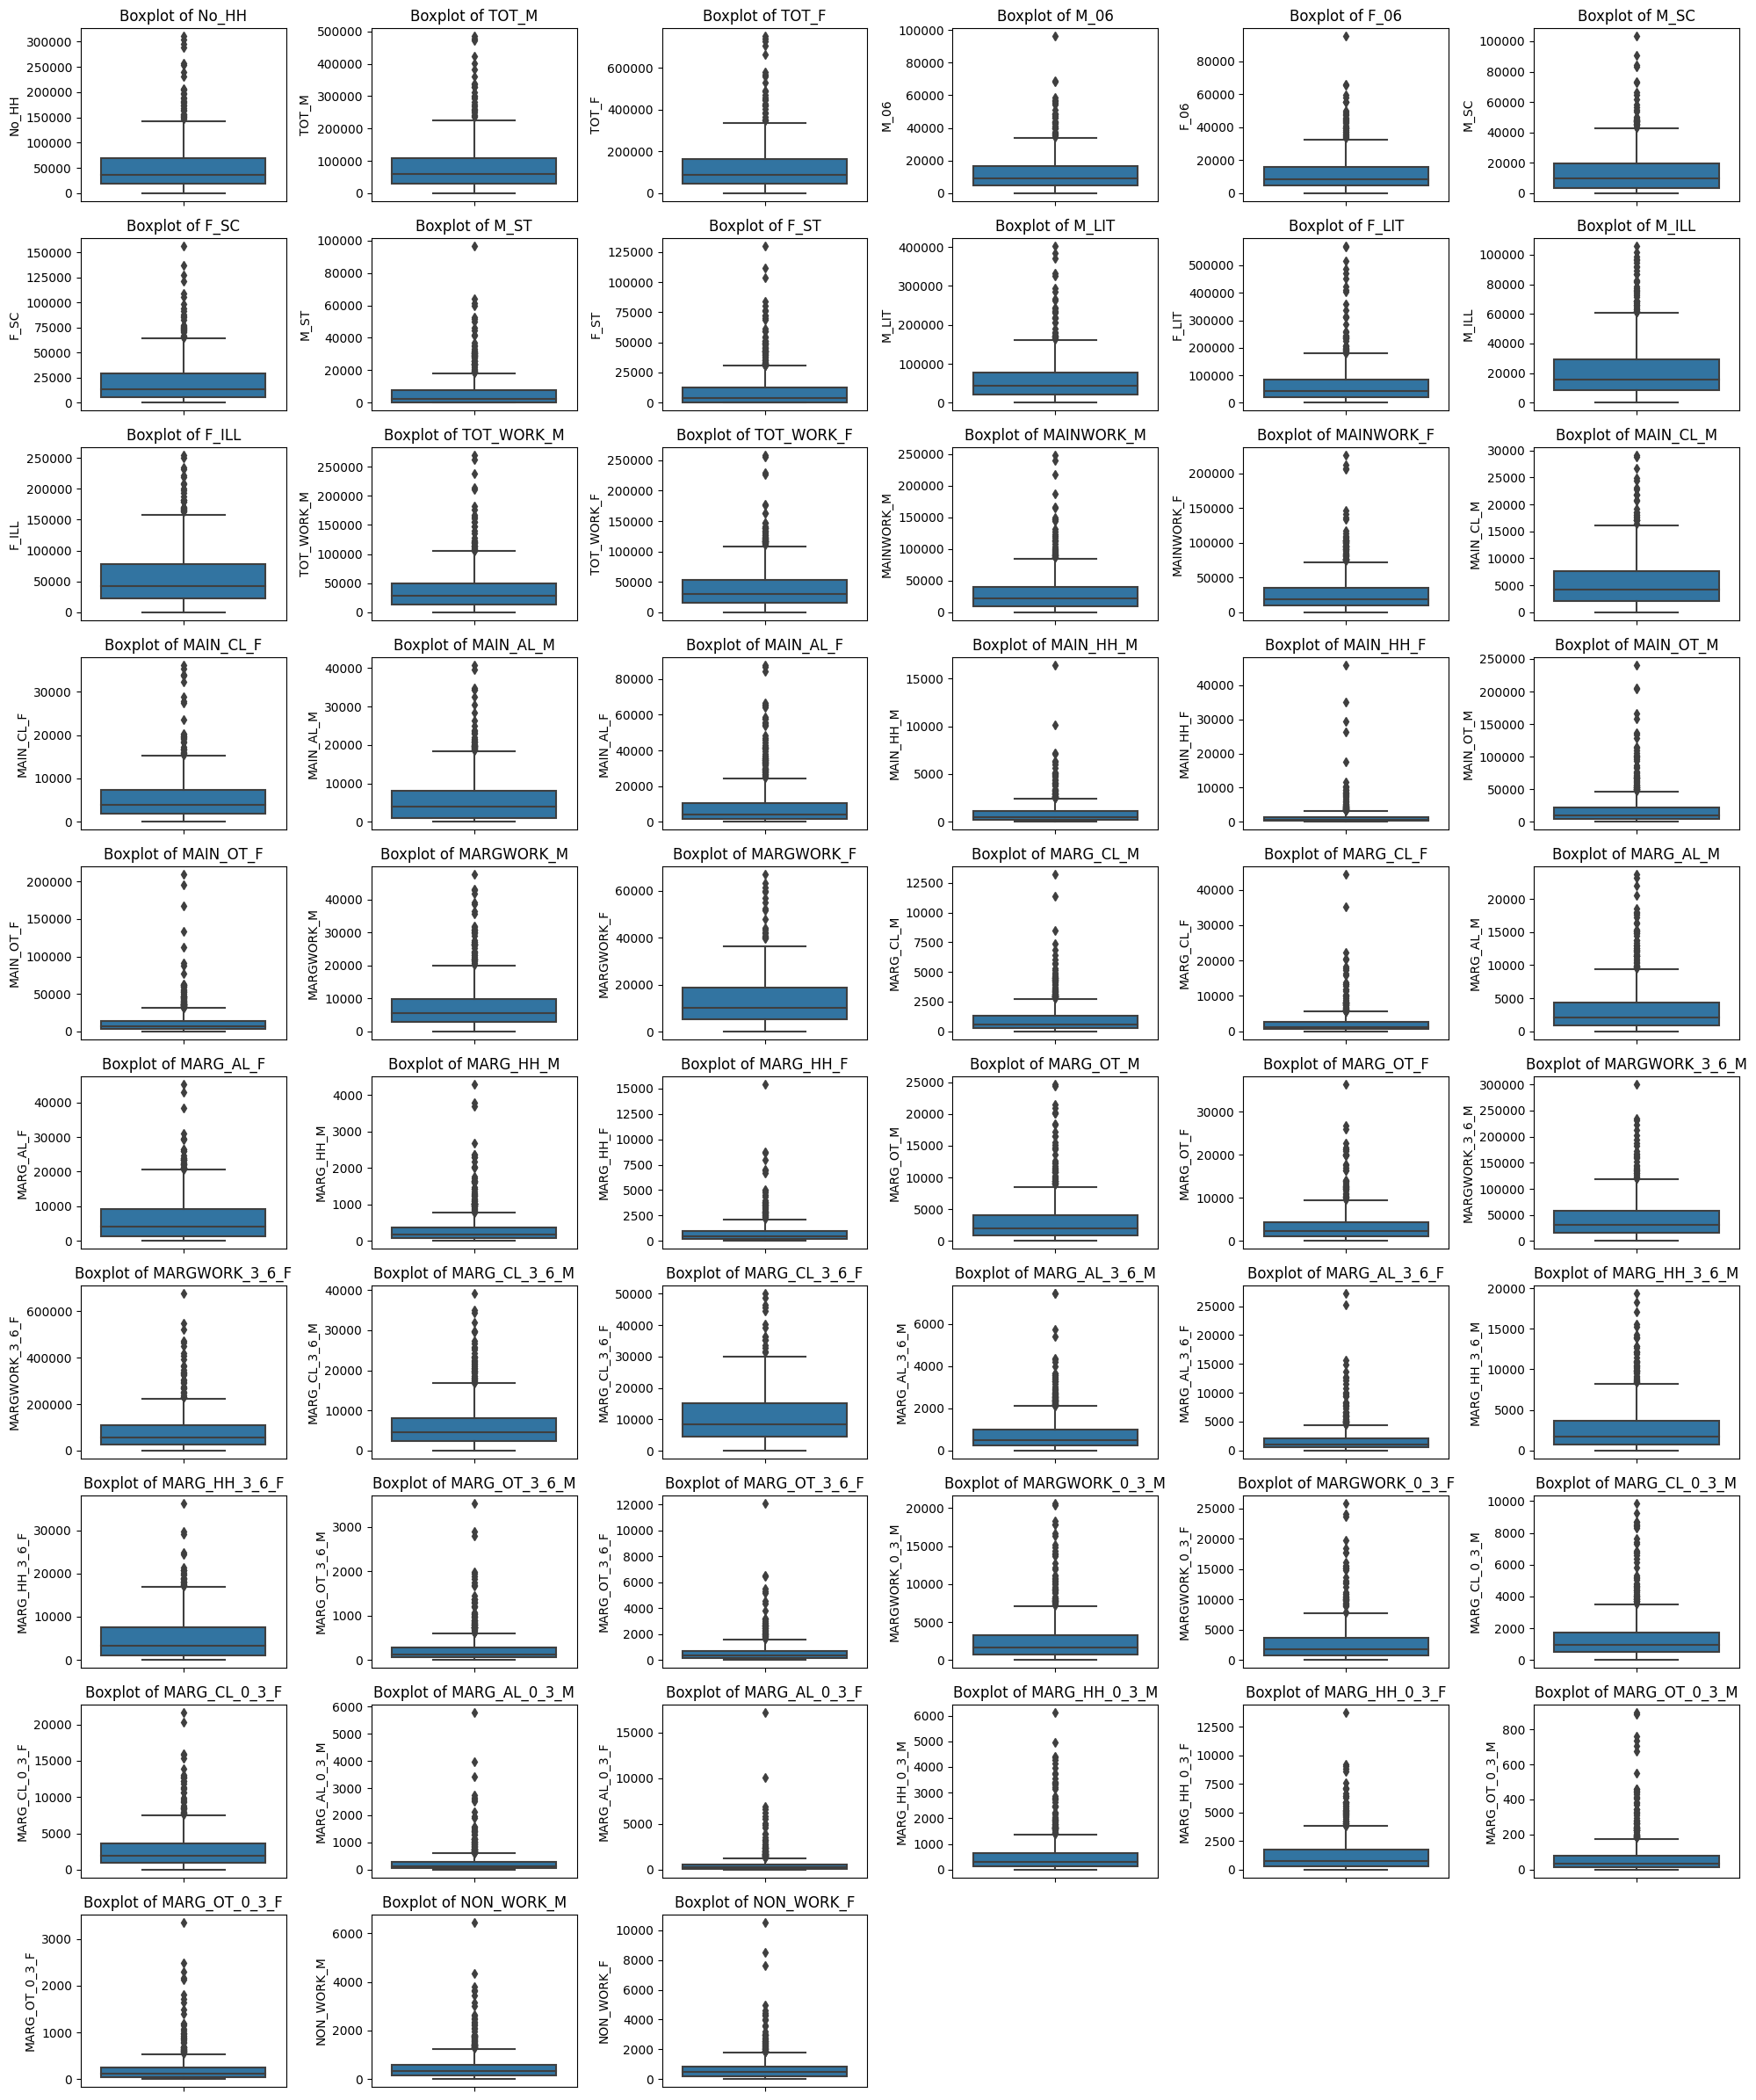

In [ ]:
plt.figure(figsize=(20,24))
feature_list=mydata.columns
for i in range(len(feature_list)):
  plt.subplot(10,6,i+1)
  sns.boxplot(y=mydata[feature_list[i]],data=mydata)
  plt.title("Boxplot of {}" .format(feature_list[i]))
  plt.tight_layout()

Treating outliers is necessary for Principal component Analysis as it very sensitive to outliers, which will affect the accuracy of the result.

PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [ ]:
from scipy.stats import zscore
mydata_scaled=mydata.apply(zscore)
mydata_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


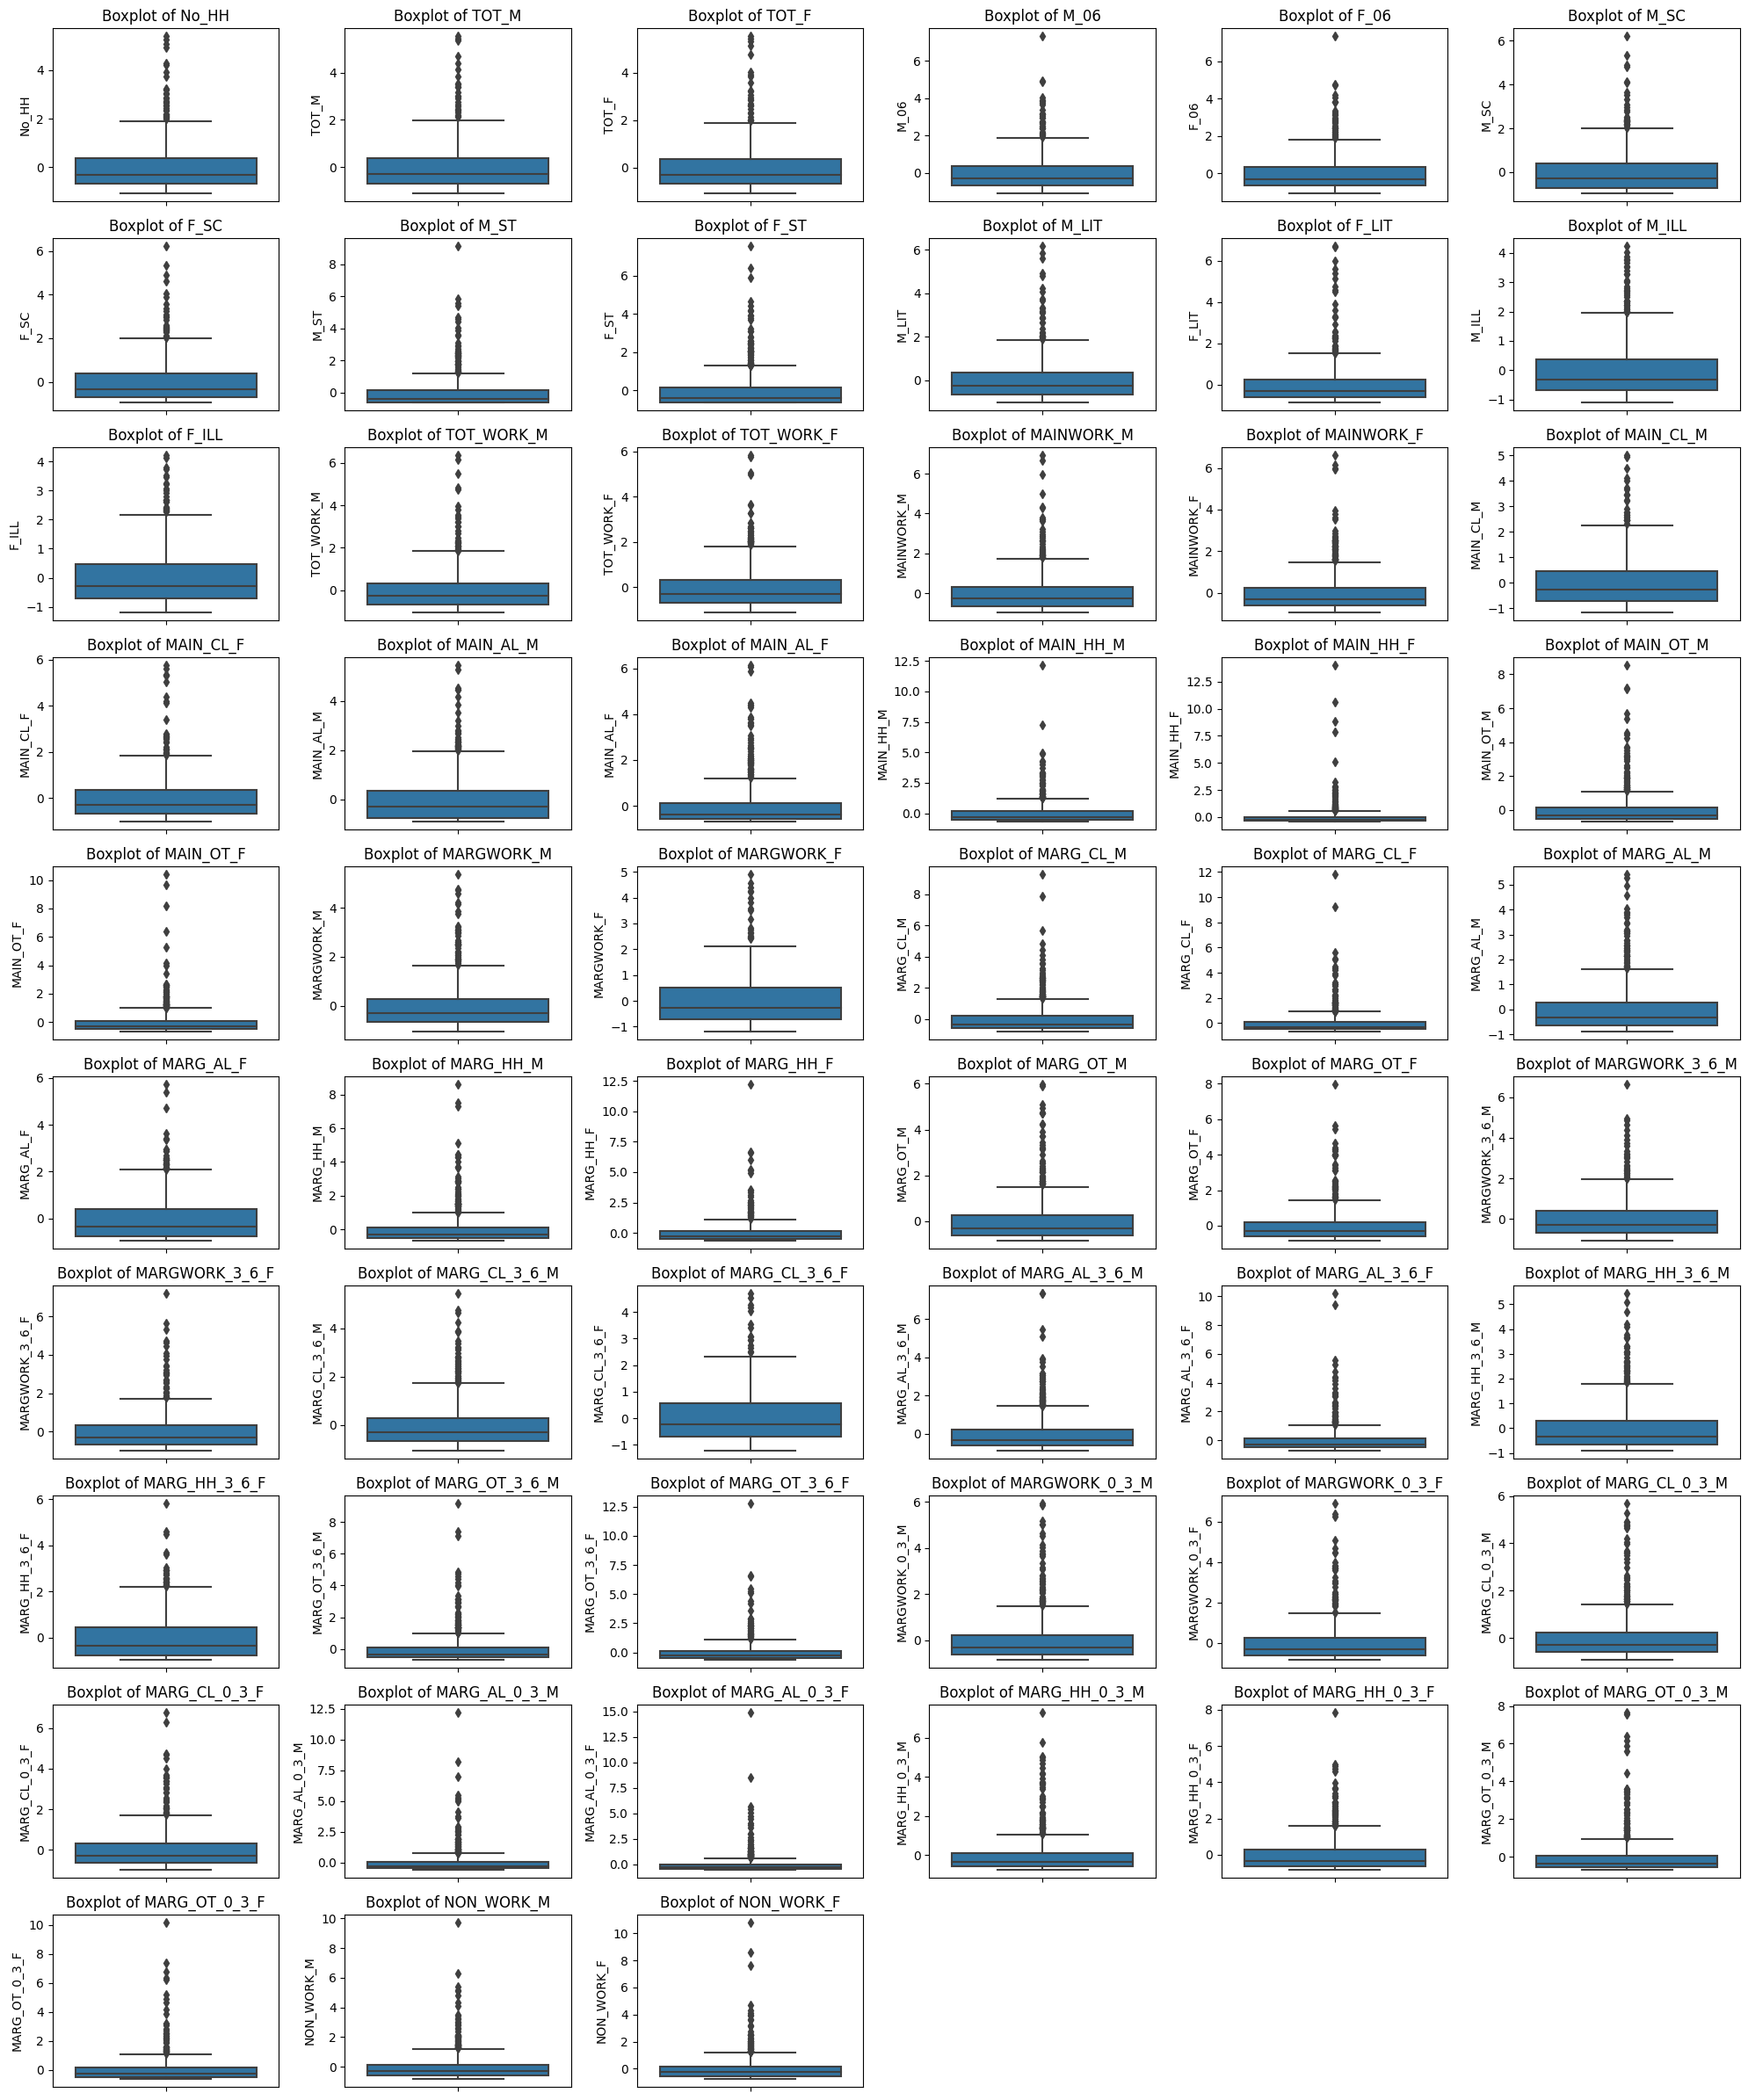

In [ ]:
plt.figure(figsize=(20,24))
feature_list=mydata_scaled.columns
for i in range(len(feature_list)):
  plt.subplot(10,6,i+1)
  sns.boxplot(y=mydata_scaled[feature_list[i]],data=mydata_scaled)
  plt.title("Boxplot of {}" .format(feature_list[i]))
  plt.tight_layout()

* There is no impact of scaling on outliers.


PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=53,random_state=1)
pca_transformed=pca.fit_transform(mydata_scaled)

In [ ]:
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        , -0.0474579 ,  0.27857004, ...,  0.02379593,
         0.08059208,  0.13272222],
       [ 0.        ,  0.02258986, -0.31252764, ...,  0.02472536,
         0.11036976,  0.08139888],
       [ 0.        ,  0.24249569, -0.30411094, ..., -0.0017941 ,
        -0.05836285,  0.01299254]])

In [ ]:
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31])

In [ ]:
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33])

PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

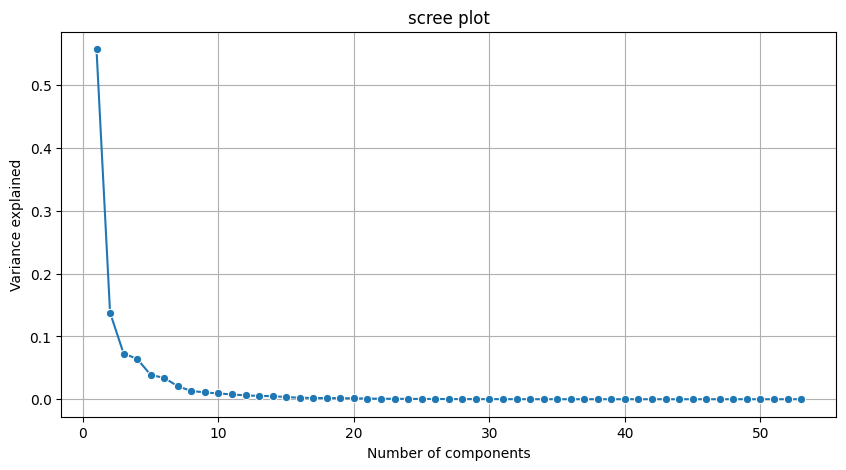

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(y=pca.explained_variance_ratio_,x=range(1,54),marker="o")
plt.xlabel("Number of components",fontsize=10)
plt.ylabel("Variance explained", fontsize=10)
plt.title("scree plot", fontsize=12)
plt.grid()
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

Using Cumulative sum, the obtained optimum number of Principal components are 6, which explains 90 % variance of data in the data set.

PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [ ]:
mydata_pca=["PC1","PC2","PC3","PC4","PC5","PC6"]
data_pca=pd.DataFrame(np.round(pca.components_[:6,:],2),index=mydata_pca,columns=mydata_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.16,-0.13,-0.00,-0.13,-0.01,0.00
TOT_M,0.17,-0.09,0.06,-0.02,-0.03,-0.07
TOT_F,0.17,-0.10,0.04,-0.07,-0.01,-0.04
M_06,0.16,-0.02,0.06,0.01,-0.05,-0.16
F_06,0.16,-0.02,0.05,0.01,-0.04,-0.15
M_SC,0.15,-0.05,0.00,0.01,-0.17,-0.06
F_SC,0.15,-0.05,-0.03,-0.03,-0.16,-0.04
M_ST,0.03,0.03,-0.12,-0.22,0.43,0.22
F_ST,0.03,0.03,-0.14,-0.23,0.44,0.23
M_LIT,0.16,-0.12,0.08,-0.04,-0.01,-0.06


In [ ]:
def color_high(val):
  if val<= -0.20:
    return 'background: pink'
  elif val>=0.20:
    return 'background: skyblue'
data_pca.T.style.applymap(color_high)


,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.160000,-0.130000,-0.000000,-0.130000,-0.010000,0.000000
TOT_M,0.170000,-0.090000,0.060000,-0.020000,-0.030000,-0.070000
TOT_F,0.170000,-0.100000,0.040000,-0.070000,-0.010000,-0.040000
M_06,0.160000,-0.020000,0.060000,0.010000,-0.050000,-0.160000
F_06,0.160000,-0.020000,0.050000,0.010000,-0.040000,-0.150000
M_SC,0.150000,-0.050000,0.000000,0.010000,-0.170000,-0.060000
F_SC,0.150000,-0.050000,-0.030000,-0.030000,-0.160000,-0.040000
M_ST,0.030000,0.030000,-0.120000,-0.220000,0.430000,0.220000
F_ST,0.030000,0.030000,-0.140000,-0.230000,0.440000,0.230000
M_LIT,0.160000,-0.120000,0.080000,-0.040000,-0.010000,-0.060000


#Insights from PCA:
* The 1st PC is a measure of 55% of all the variables.
* The 2nd PC has high marginal cultivation population of male and female, marginal agricultural labour of male and female.
* The 3rd PC has high marginal agriculture labour male and female and marginal cultivation population. Has less marginal household industry population female.
* The 4th PC has high Marginal other worker population male and female, marginal other worker population, marginal household population male and female.
* The 5th PC has high ST population male and female and non-working population female.
* The 6th PC has higher marginal other worker population female, marginal industry household population female, main household industry population.



PCA: Write linear equation for first PC.

In [ ]:
for i in range(0,57):
  print("(",np.round(pca.components_[0][i],2),")",'*',mydata_scaled.columns[i],end='+')

( 0.16 ) * No_HH+( 0.17 ) * TOT_M+( 0.17 ) * TOT_F+( 0.16 ) * M_06+( 0.16 ) * F_06+( 0.15 ) * M_SC+( 0.15 ) * F_SC+( 0.03 ) * M_ST+( 0.03 ) * F_ST+( 0.16 ) * M_LIT+( 0.15 ) * F_LIT+( 0.16 ) * M_ILL+( 0.17 ) * F_ILL+( 0.16 ) * TOT_WORK_M+( 0.15 ) * TOT_WORK_F+( 0.15 ) * MAINWORK_M+( 0.12 ) * MAINWORK_F+( 0.1 ) * MAIN_CL_M+( 0.07 ) * MAIN_CL_F+( 0.11 ) * MAIN_AL_M+( 0.07 ) * MAIN_AL_F+( 0.13 ) * MAIN_HH_M+( 0.08 ) * MAIN_HH_F+( 0.12 ) * MAIN_OT_M+( 0.11 ) * MAIN_OT_F+( 0.16 ) * MARGWORK_M+( 0.16 ) * MARGWORK_F+( 0.08 ) * MARG_CL_M+( 0.05 ) * MARG_CL_F+( 0.13 ) * MARG_AL_M+( 0.11 ) * MARG_AL_F+( 0.14 ) * MARG_HH_M+( 0.13 ) * MARG_HH_F+( 0.16 ) * MARG_OT_M+( 0.15 ) * MARG_OT_F+( 0.16 ) * MARGWORK_3_6_M+( 0.16 ) * MARGWORK_3_6_F+( 0.17 ) * MARG_CL_3_6_M+( 0.16 ) * MARG_CL_3_6_F+( 0.09 ) * MARG_AL_3_6_M+( 0.05 ) * MARG_AL_3_6_F+( 0.13 ) * MARG_HH_3_6_M+( 0.11 ) * MARG_HH_3_6_F+( 0.14 ) * MARG_OT_3_6_M+( 0.12 ) * MARG_OT_3_6_F+( 0.15 ) * MARGWORK_0_3_M+( 0.15 ) * MARGWORK_0_3_F+( 0.15 ) * MAR